# Credit Risk & Default Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/gabrielstalley/Desktop/banking_analyst_portfolio/synthetic_credit_risk_data.csv')

df.head()


,customer_id,age,annual_income,employment_length_years,credit_history_years,credit_score,revolving_limit,credit_utilization,debt_to_income,delinquencies_2y,hard_inquiries_6m,open_accounts,loan_amount,term_months,apr,monthly_payment,purpose,region,defaulted
0,C100000,25,116210.05,0.0,0.5,593,25292.92,0.669,0.020,4,0,4,37100,60,0.128,840.58,credit_card,West,0
1,C100001,62,42906.21,4.4,13.0,559,14880.15,0.258,0.312,0,2,9,8900,36,0.129,299.35,debt_consolidation,South,0
2,C100002,56,18000.00,1.4,13.3,460,4079.26,0.362,0.636,4,1,14,5300,36,0.241,208.27,debt_consolidation,West,0
3,C100003,44,24595.37,2.0,7.4,507,4651.59,0.524,1.013,0,3,6,1100,36,0.277,45.34,debt_consolidation,Northeast,0
4,C100004,44,142064.63,1.3,2.6,609,46293.31,0.733,0.165,2,1,6,23900,36,0.144,821.46,debt_consolidation,Northeast,0


In [7]:
default_rate = df['defaulted'].mean()
default_rate

df['defaulted'].value_counts()
df['defaulted'].value_counts(normalize=True)

0    0.798167
1    0.201833
Name: defaulted, dtype: float64

### Baseline Risk Segments (Credit Score Bands)

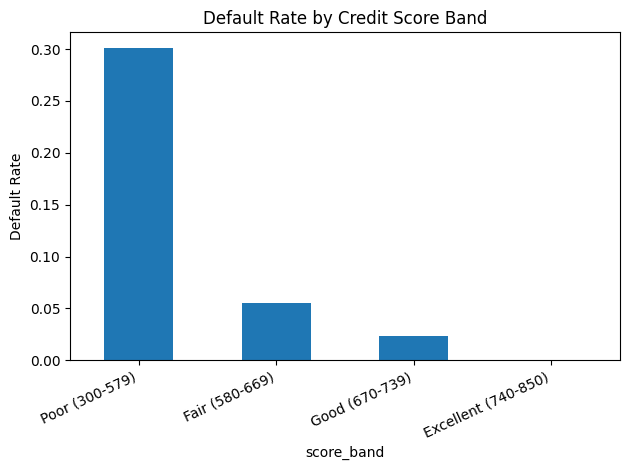

In [15]:
bins = [300, 580, 670, 740, 850]
labels = ['Poor (300-579)', 'Fair (580-669)', 'Good (670-739)', 'Excellent (740-850)']

df['score_band'] = pd.cut(df['credit_score'], bins=bins, labels=labels, include_lowest=True)

band_default = df.groupby('score_band')['defaulted'].mean().sort_index()
band_default

band_default.plot(kind = 'bar')
plt.ylabel('Default Rate')
plt.title('Default Rate by Credit Score Band')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

### What Drives Risk?

util_band
Low        0.066534
Med-Low    0.136091
Med        0.233688
High       0.371658
Name: defaulted, dtype: float64
dti_band
Low        0.044548
Med-Low    0.116155
Med        0.209441
High       0.438420
Name: defaulted, dtype: float64


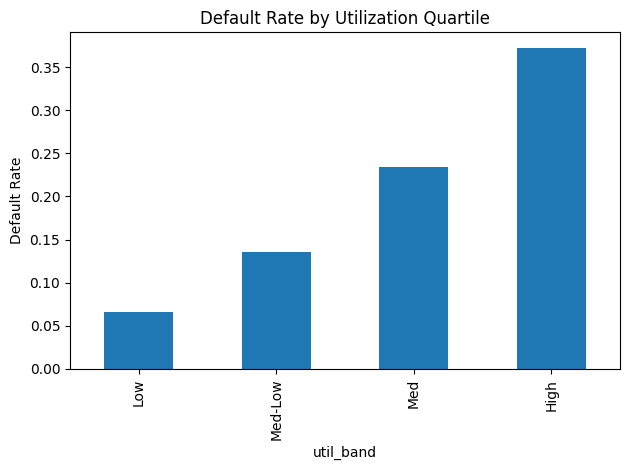

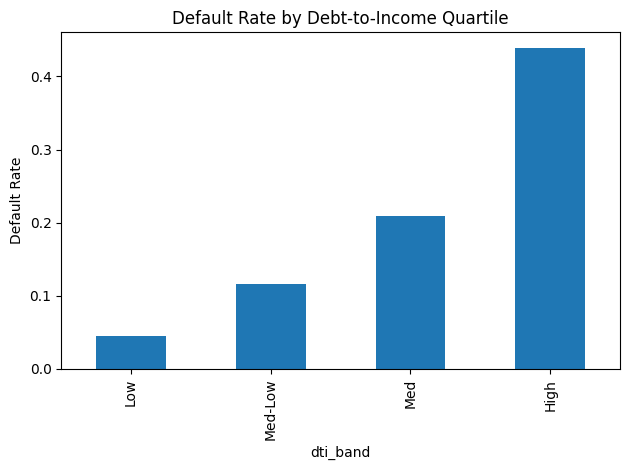

In [11]:
df['util_band'] = pd.qcut(df['credit_utilization'], 4, labels=['Low', 'Med-Low', 'Med', 'High'])
df['dti_band'] = pd.qcut(df['debt_to_income'], 4, labels= ['Low', 'Med-Low', 'Med', 'High'])

util_default = df.groupby('util_band')['defaulted'].mean()
dti_default = df.groupby('dti_band')['defaulted'].mean()

print(util_default)
print(dti_default)

util_default.plot(kind="bar")
plt.ylabel("Default Rate")
plt.title("Default Rate by Utilization Quartile")
plt.tight_layout()
plt.show()

dti_default.plot(kind="bar")
plt.ylabel("Default Rate")
plt.title("Default Rate by Debt-to-Income Quartile")
plt.tight_layout()
plt.show()


### Risk Score

In [18]:
df['score_risk'] = 1 - (df['credit_score'] - 300) / (850 - 300)
df['util_risk'] = df['credit_utilization']
df['dti_risk'] = df['debt_to_income'] / df['debt_to_income'].max()
df['delinq_risk'] = df['delinquencies_2y'] / df['delinquencies_2y'].max()

df['risk_score'] = (
    0.45 * df['score_risk'] +
    0.25 * df['util_risk'] +
    0.20 * df['dti_risk'] +
    0.10 * df['delinq_risk']
)

df['risk_score'].describe()

df.groupby(pd.qcut(df['risk_score'], 10))['defaulted'].mean().reset_index()

,risk_score,defaulted
0,"(0.0776, 0.298]",0.013333
1,"(0.298, 0.342]",0.025000
2,"(0.342, 0.377]",0.036667
3,"(0.377, 0.408]",0.068333
4,"(0.408, 0.441]",0.100000
5,"(0.441, 0.473]",0.121667
6,"(0.473, 0.508]",0.223333
7,"(0.508, 0.551]",0.270000
8,"(0.551, 0.61]",0.460000
9,"(0.61, 0.854]",0.700000
